In [1]:
import pandas as pd

df = pd.read_csv('data/world-happiness/2015.csv', index_col='Country')
df.head(2)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


# **Plotting Data**

In order to show the plots inside the notebook's output, you might need to invoke the ```%matplotlib inline``` command. For the aggregation of multiple plots is neater to use some matplotlib commands to setup the objects, so import with ```import matplotlib.pyplot as plt```.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

pandas provides a convinient interface to matplotlib and improves on the default style. 

In order to show the plots inside the notebook's output, you might need to invoke the ```%matplotlib inline``` command. For the aggregation of multiple plots is neater to use some matplotlib commands to setup the objects, so import with ```import matplotlib.pyplot as plt```.

For the full official guide, visit [the official pandas visualisation user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Here, we'll go over the most important plots:
- line plot
- scatter plot
- bar chart
- frequency histogram

and features:
- adding grid, resizing the figure, changing color, etc..
- setting axis limits
- overlaying plots
- multiple plots in one figure
- saving to file

### The `plot` method and related methods
Both DataFrame and Series have the plot method.
- Series will automatically use the values as y and index as x: ```df['points'].plot()```
- Dataframe will need to be instructed on where to plot what: ```df.plot(y='points')```

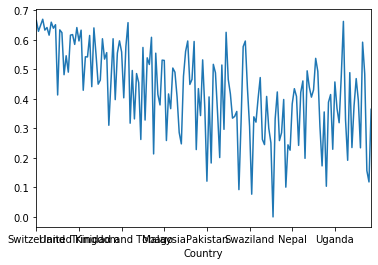

In [3]:
# line plot
df['Freedom'].plot()

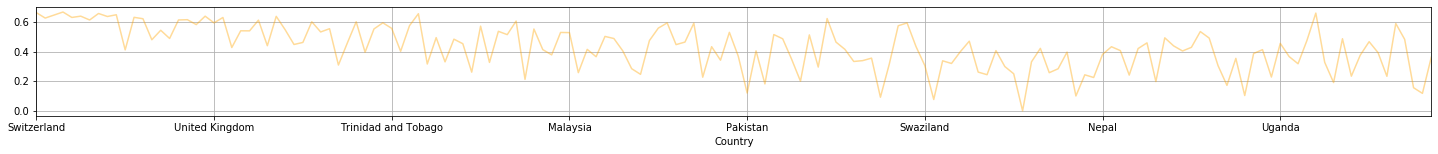

In [4]:
# to style it a bit pass parameters to the plot method
df['Freedom'].plot(grid=True, figsize=(25,2), color='orange', alpha=0.4)

By default, the plot is of type `line`. 
So ```df['points'].plot()``` is equivalent to ```df['points'].plot(kind='line')```

A more convenient way to set the type of plot type is to use the following syntax:
- **bar**: ```df['colname'].plot.bar()```
- **histogram**: ```df['colname'].plot.hist()```
- **scatter**: ```df.plot.scatter(x=colname_x, y=colname_y)``` for the scatter plot you need to set which variable goes where

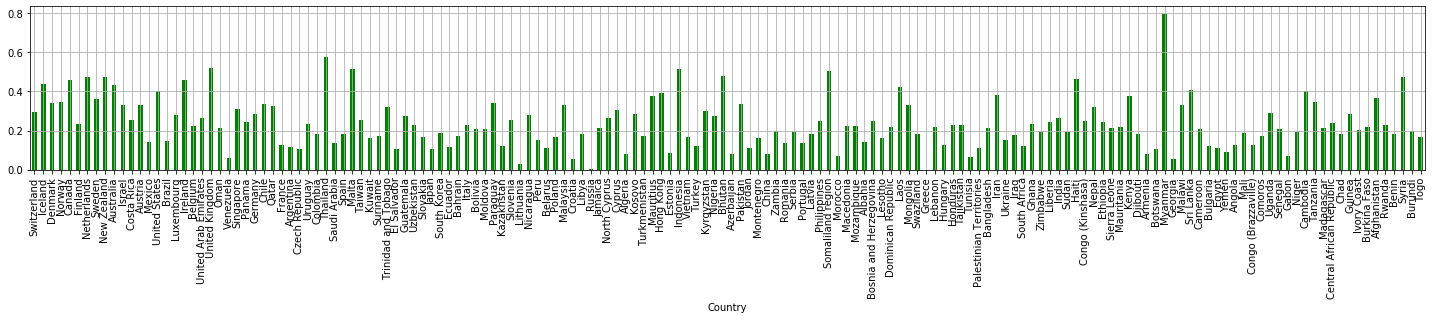

In [5]:
# bar plot
df['Generosity'].plot.bar(grid=True, figsize=(25,3), color='green')

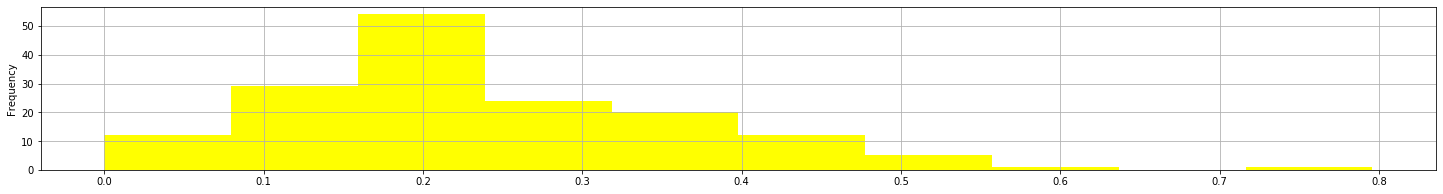

In [6]:
# histagram
df['Generosity'].plot.hist(grid=True, figsize=(25,3), color='yellow')

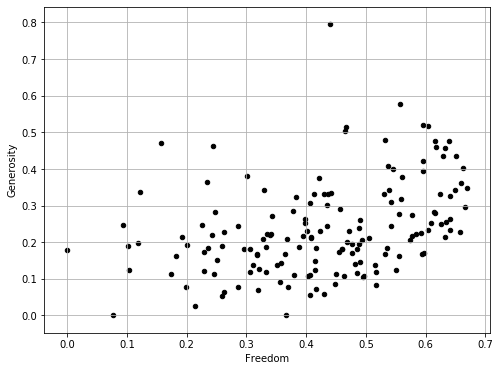

In [7]:
# scatter plot
df.plot.scatter(x='Freedom', y='Generosity', grid=True, figsize=(8,6), color='black')

### the matplotlib `Axes` object
Pandas allows quick plotting and basic customisation. The plot method returs a matplotlib `Axes` object that can be used to further customise it using matplotlib commands.

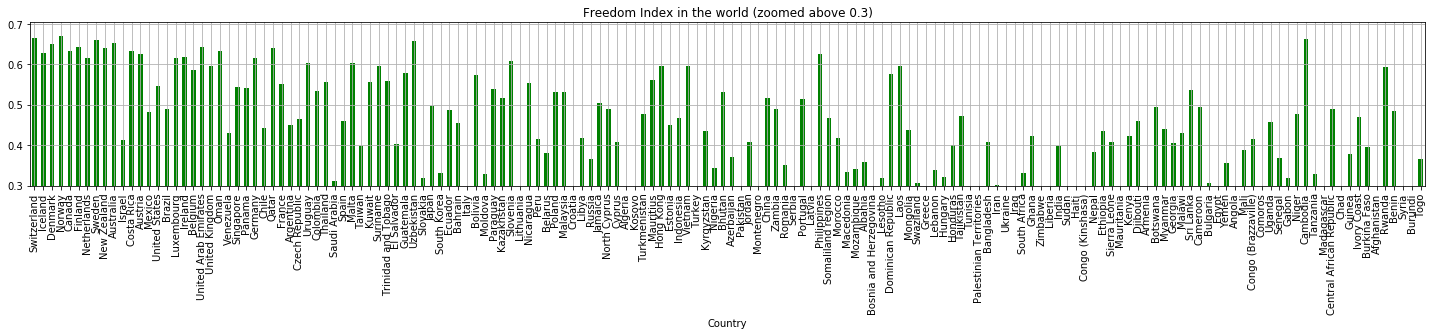

In [8]:
ax = df['Freedom'].plot.bar(grid=True, figsize=(25,3), color='green')
ax.set_title('Freedom Index in the world (zoomed above 0.3)')
ax.set_ylim(0.3, None);

### ***EXERCISE 6.1***
create a scatter plot of Happyness as a function of GDP and colorcode each point by Freedom score.

Also, zoom in the area of GDP 1 to 1.8 and Happyness 5 to 8 using the `Axes` object methods.

**HINT**: colorcoding can be done by passing `c` and optionally `cmap`. Look at the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html).

In [9]:
# insert solution here

### Multiple plots

When wanting to overlay multiple plots you can simply call the plot method by ensuring you are using the same `Axes` object. 

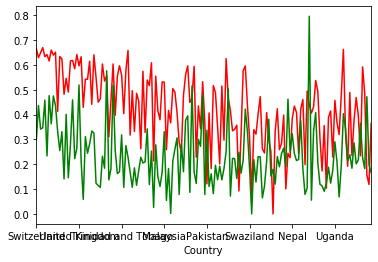

In [10]:
ax = df['Freedom'].plot(color='red')
df['Generosity'].plot(ax=ax, color='green')

When creating a single figure with multiple plots it's a good idea to setup the figure layout with matplotlib's ```plt.subplots``` which returns the figure object and an iterable of axes within.

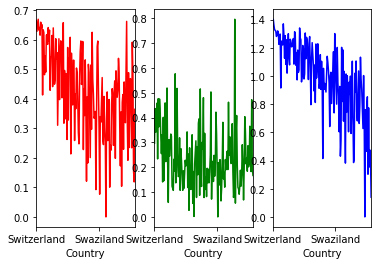

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df['Freedom'].plot(ax=axes[0], color='red')
df['Generosity'].plot(ax=axes[1], color='green')
df['Family'].plot(ax=axes[2], color='blue')

### Saving to file
In order to save to file you can simply use the `savefig('<path-to-file>')` method of the matplotlib `Figure` object.
The figure object can be easily obtained from the `Axes` child object by calling `ax.figure`

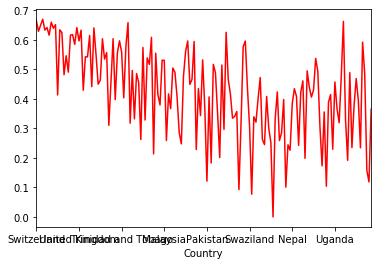

In [12]:
ax = df['Freedom'].plot(color='red')
ax.figure.savefig('my_beautiful_plot.png')

In [13]:
import os; os.remove("my_beautiful_plot.png")  # deleting the file

### ***EXERCISE 6.2***
Create a figure with 2 plots stacked vertically.
- the top one should be a line chart of 'Freedom' and a bar chart of 'Generosity' overlayed.
- the bottom one shoud be a scatter plot of 'Happiness Score' vs 'Family' scores.
- plot freedom in red and generosity in green.
- set the size of the figure to (25,8)

**HINT**: figure size can be also conveniently set from the Figure object using the `set_size_inches` method.

In [14]:
# insert solution here